## Task 1. Making sense of arrests data

## Task 1 Search for Mahmoud Khalil

Is Mahmoud Khalil in the dataset? The highest probability is that he is not. As the evidence I gathered in the exploratory analysis of the database documentation points to. 

The most important piece of knowledge to understand this that this database does not represent the full universe of immigration-related arrests, only "administrative arrests" performed by Enforcement Removal Operations (ERO) within Immigration and Customs Enforcement (ICE), as reported by the professor and legal expert Austin Kocher (linked in the documentation of the data)

The key question to report on is if Khalil's notice to appear order (NTA) performed on March the 8th was issued by ERO or by Homeland Security Investigations (HSI), which is the case since he was targeted not on violations of immigration policies but on the supposed grounds of posing "potentially serious adverse foreign policy consequences for the United States" according to US Secretary of State Marco Rubio.

Administrative arrests should be linked to administrative warrants but there are exceptions, for isntance, arrests can an are being performed by ERO without warrants if they argue they have reason to believe the person in question is either entering the country illegaly or is already in the country and likely to escape before a warrant can be obtained. Therefore, some arrests with no warrant issued could be included in the database but only the ones enacted by ERO.

Still, drilling down in the database is a useful excercise to see what records within say.

Documention of the dataset states that "located" and "non-custodial arrest" are most likely to be detentions not at a jail or prison.AP and NYTimes record the date of arrest on Saturday March the 8th in his Columbia university owned apartement, which The Guardian states is blocks away from the main campus.

But we need to take into consideration that data is not complete, 21% is missing in the column "State Apprehension" but only 2% is missing from the column "Area of Reponsibility" (AOR), which can be much more closer to ground truth. Age has a 100% of records, therefore I filtered for all individuals born in 1995 detained on March the 8th, a day before and a day after, to explore the results. 

There are 58 records with this characteristics, none of them with a missing value under AOR. Then there are 2 records in the New York City AOR, one with a criminal criminal conviction departed to El Salvador and arrested on March the 7th, which excludes him from the scope and the other with 2 criminal pending charges and a Salvadorean nationality, where the criminal charges are the most telling feature to exclude him to be a match. 

My recommendation would be to file a FOIA request or get a hold of the HSI arrests database. 

Code is below

In [2]:
# Import libraries
import pandas as pd
import os
from pathlib import Path
import pandas as pd
import pyxlsb
import re

In [3]:
#Arranging paths

if Path.cwd().name == '_notebooks':
    os.chdir('..')  # Go to project root
elif not (Path.cwd() / '__notebooks').exists():
    # Find and change to project root
    for parent in Path.cwd().parents:
        if (parent / 'notebooks').exists():
            os.chdir(parent)
            break

print(f"Working directory set to: {Path.cwd()}")

Working directory set to: /Users/allegratuvida/Desktop/escritorio/data_critica_2025/Proyectos en desarrollo/Lighthouse_ICE/lighthouse_ice


In [4]:
# Ingest xlsx files



df_arrests = pd.read_excel('data/raw/ice_release_jul2025/2025-ICLI-00019_2024-ICFO-39357_ERO Admin Arrests.xlsx', skiprows=6)




In [5]:
# List the column names
print("Column names:", df_arrests.columns.tolist())

# Show a statistical summary for each column
df_arrests.describe(include='all')



Column names: ['Apprehension Date', 'Apprehension State', 'Apprehension County', 'Apprehension AOR', 'Final Program', 'Final Program Group', 'Apprehension Method', 'Apprehension Criminality', 'Case Status', 'Case Category', 'Departed Date', 'Departure Country', 'Final Order Yes No', 'Final Order Date', 'Birth Date', 'Birth Year', 'Citizenship Country', 'Gender', 'Apprehension Site Landmark', 'Alien File Number', 'EID Case ID', 'EID Subject ID', 'Unique Identifier']


,Apprehension Date,Apprehension State,Apprehension County,Apprehension AOR,Final Program,Final Program Group,Apprehension Method,Apprehension Criminality,Case Status,Case Category,...,Final Order Date,Birth Date,Birth Year,Citizenship Country,Gender,Apprehension Site Landmark,Alien File Number,EID Case ID,EID Subject ID,Unique Identifier
count,265226,208983,0.0,259323,265226,265226,265226,265226,261328,261328,...,160289,265226,265226.000000,265226,265226,259126,263203,261328,265226,263203
unique,NaN,61,NaN,26,14,1,25,3,13,29,...,NaN,1,NaN,194,3,4968,1,1,1,249872
top,NaN,TEXAS,NaN,Miami Area of Responsibility,ERO Criminal Alien Program,ICE,CAP Local Incarceration,1 Convicted Criminal,ACTIVE,[8C] Excludable / Inadmissible - Administrativ...,...,NaN,"(b)(6), (b)(7)(C)",NaN,MEXICO,Male,DALLAS COUNTY GENERAL AREA,"(b)(6), (b)(7)(C)","(b)(6), (b)(7)(C), (b)(7)(E)","(b)(6), (b)(7)(C), (b)(7)(E)",1e2ec1831c1fd33fdb93b412699a798db3544957
freq,NaN,52778,NaN,26925,162433,265226,112103,123124,111110,76599,...,NaN,265226,NaN,101036,230238,11105,263203,261328,265226,7
mean,2024-09-27 10:56:18.055142144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2021-01-25 01:16:33.043814656,NaN,1989.950356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2023-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1967-01-06 00:00:00,NaN,1934.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2024-03-29 06:39:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-04-29 00:00:00,NaN,1983.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2024-11-04 07:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2024-03-25 00:00:00,NaN,1991.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2025-04-03 08:49:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2025-01-23 00:00:00,NaN,1998.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2025-06-27 09:38:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2025-06-26 00:00:00,NaN,2024.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Show the data type of each column
print("\nData types for each column:")
print(df_arrests.dtypes)


Data types for each column:
Apprehension Date             datetime64[ns]
Apprehension State                    object
Apprehension County                  float64
Apprehension AOR                      object
Final Program                         object
Final Program Group                   object
Apprehension Method                   object
Apprehension Criminality              object
Case Status                           object
Case Category                         object
Departed Date                 datetime64[ns]
Departure Country                     object
Final Order Yes No                    object
Final Order Date              datetime64[ns]
Birth Date                            object
Birth Year                             int64
Citizenship Country                   object
Gender                                object
Apprehension Site Landmark            object
Alien File Number                     object
EID Case ID                           object
EID Subject ID            

In [7]:
#Making sure data is clean, frequency table for each column in df_arrests

# Create a frequency table for each column in df_arrests, including counts and percentages, and save to CSV

freq_tables = []

for col in df_arrests.columns:
    counts = df_arrests[col].value_counts(dropna=False)
    percentages = df_arrests[col].value_counts(normalize=True, dropna=False) * 100
    freq_df = pd.DataFrame({
        'column': col,
        'value': counts.index,
        'count': counts.values,
        'percentage': percentages.values
    })
    freq_tables.append(freq_df)

# Concatenate all frequency tables into one DataFrame
all_freq_df = pd.concat(freq_tables, ignore_index=True)

# Save to CSV
all_freq_df.to_csv('outputs/arrests_frequency_tables.csv', index=False)


    

In [8]:
# Writing a function in case this task is needed for other dataframes

def save_frequency_tables(df, csv_path):
    """
    Creates a frequency table for each column in the DataFrame, including counts and percentages,
    concatenates them, and saves to a CSV file.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        csv_path (str): The path to save the resulting CSV file.
    """
    freq_tables = []
    for col in df.columns:
        counts = df[col].value_counts(dropna=False)
        percentages = df[col].value_counts(normalize=True, dropna=False) * 100
        freq_df = pd.DataFrame({
            'column': col,
            'value': counts.index,
            'count': counts.values,
            'percentage': percentages.values
        })
        freq_tables.append(freq_df)
    all_freq_df = pd.concat(freq_tables, ignore_index=True)
    all_freq_df.to_csv(csv_path, index=False)
    return all_freq_df



In [9]:


# Ensure "Apprehension Date" is datetime
df_arrests["Apprehension Date"] = pd.to_datetime(df_arrests["Apprehension Date"], errors="coerce")

# Define date range: two days before and after 2025-03-08
start_date = pd.Timestamp("2025-03-06")
end_date = pd.Timestamp("2025-03-09")

# Filter by date
date_mask = (df_arrests["Apprehension Date"] >= start_date) & (df_arrests["Apprehension Date"] <= end_date)

# Filter by year of birth

birth_mask = df_arrests["Birth Year"].between(1994, 1996)

# Filter by "New York" in the appropriate column 
# Replace 'Field Office' with the actual column name if different
location_mask = df_arrests["Apprehension AOR"] == "New York City Area of Responsibility"

# Filter by "Located" OR "Non-custodial Arrest" in "Aprehension method" column
method_mask = df_arrests["Apprehension Method"].isin(["Located", "Non-custodial Arrest"])

# Combine all filters
filtered_df = df_arrests[date_mask & location_mask & method_mask]


In [10]:
# Save to CSV
filtered_df.to_csv('outputs/tables/arrests_filtered_table.csv', index=False)



## Task 2 finding jails or prisons individuales have been taken to and adding a County column


The team wants to understand whether the "Apprehension Site Landmark" column could provide clues about potential partnerships between local and state law enforcement and ICE.

Use this column to help identify which jail or prison individuals have been taken to, where available. Add one column to the dataset indicating the name of the facility, and another showing the county where that facility is located.

---

This is not the most accurate way to obtain information on what jails, facilities and counties individuales have been take to, since this information is available in the rest of the tables of the dataset, detentions and detainers. However, within the dataset, "Apprehension Site Landmark" is indeed the most granular variable relevant to the county of apprehension and jails or prisons, as AOR can cover more than one state and hence not very tied to counties at all. 

String analysis based on string lenght within the column shows most common arrangements that are not part of the name of the county before the word "county" are "Fugitive Operations" or "Fugitive operations on street" or "At large arrest", "All areas inside", "CAP", standing for Custody Alternatives Program and a combination of one to three letters, a white space before and after a dash, stating the abbreviation of a state, all of which I excluded to then extract the counties from the column. 

I created a function that detects a parameter, in this case a string, that can be changed from "county" to "jail" and "prison", or "facility". It excludes the said patterns and then retrieves all words before each of these two words. Then I extracted the string match to one of two columns: either "county_name" or "facility_name". 

The objective is to look for in the column for commons ways to refer to prisons and match those patterns in the Apprehension Site Landamark. 

With this method, though, there is only the possibility to retrieve 44% of the counties.

For the facilities, I included in my function a way to detect the most commons facility patterns: the words "center", "correctional", "penitentiary", "removal", "office", "department" as the end words of such terms as "service processing center", for instance and that may relate to collaboration with local enforcement authorities (LEA). This approach is still incomplete, as it only renders 32% of the total values of the arrest. 

In [11]:
###Cleaning "Apprehension Site Landmark" column

# Function to strip whitespaces and check for inconsistent casing

def clean_and_check_column(df, col_name):
    """
    Cleans the specified column in the DataFrame by stripping leading/trailing spaces,
    checks for inconsistent casing of 'county', and prints a summary of inconsistencies.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        col_name (str): The name of the column to clean and check.
    """
    # Strip leading/trailing spaces
    df[col_name] = df[col_name].astype(str).str.strip()
    
    # Check for inconsistent casing
    has_upper = df[col_name].str.contains("COUNTY")
    has_lower = df[col_name].str.contains("county")
    count_upper = has_upper.sum()
    count_lower = has_lower.sum()
    
    if count_upper > 0 and count_lower > 0:
        print(f"Inconsistency found: {count_upper} rows use 'COUNTY', {count_lower} rows use 'county'.")
    elif count_upper > 0:
        print("All rows use 'COUNTY' (uppercase).")
    elif count_lower > 0:
        print("All rows use 'county' (lowercase).")
    else:
        print("No rows contain the word 'county' or 'COUNTY'.")
    
    # Check for leading/trailing spaces
    leading_spaces = df[col_name].str.match(r"^\s+").sum()
    trailing_spaces = df[col_name].str.match(r".*\s+$").sum()
    if leading_spaces > 0 or trailing_spaces > 0:
        print(f"Found {leading_spaces} rows with leading spaces and {trailing_spaces} rows with trailing spaces.")
    else:
        print("No leading or trailing spaces found.")



In [12]:
# Applying function to the "Apprehension Site Landmark" column

clean_and_check_column(df_arrests, "Apprehension Site Landmark")

All rows use 'COUNTY' (uppercase).
No leading or trailing spaces found.


In [13]:
# Understanding the structure of strings, possible number of words before "COUNTY" (I'll make it case insensitive anyways)

def words_before_county(text):
    """
    Returns the number of words before the word 'county' (case-insensitive) in a string.
    Returns None if 'county' is not found.
    """
    if not isinstance(text, str):
        return None
    match = re.search(r'\b(\w+(?:\s+\w+)*)\s+county\b', text, re.IGNORECASE)
    if match:
        before = match.group(1)
        return len(before.split())
    return None

In [14]:
# Apply to the column and get the range
word_counts = df_arrests["Apprehension Site Landmark"].dropna().apply(words_before_county)
print("Range of number of words before 'county':", word_counts.min(), "to", word_counts.max())

Range of number of words before 'county': 1.0 to 6.0


In [15]:
# Understand what is the pattern in string with more than three words before "COUNTY"

# Function to count words before 'county'
def words_before_county(text):
    """
    Returns the number of words before the word 'county' (case-insensitive) in a string.
    Returns None if 'county' is not found.
    """
    if not isinstance(text, str):
        return None
    match = re.search(r'\b(\w+(?:\s+\w+)*)\s+county\b', text, re.IGNORECASE)
    if match:
        before = match.group(1)
        return len(before.split())
    return None

# Apply function and filter rows with more than 3 words before 'county'
df_arrests['words_before_county'] = df_arrests["Apprehension Site Landmark"].apply(words_before_county)
result = df_arrests[df_arrests['words_before_county'] > 2]



In [16]:
def extract_cleaned_phrases(text, basis_word="county"):
    """
    For each instance of the basis_word (e.g., 'county'), remove unwanted phrases/patterns before it,
    and extract the cleaned phrase before and including the basis_word.
    Returns a single string with all such cleaned phrases joined by '; ', or None if nothing found.
    """
    if not isinstance(text, str):
        return None

    unwanted_phrases = [
        r"fugitive operations",
        r"fugitive operations on street",
        r"at large arrest",
        r"all areas inside",
        r"cap",
        r"\b[a-zA-Z]{1,3}\s-\s"
    ]
    unwanted_pattern = re.compile("|".join(unwanted_phrases), re.IGNORECASE)

    results = []
    for match in re.finditer(rf"(.*?\b{basis_word}\b)", text, re.IGNORECASE):
        phrase = match.group(1)
        cleaned = unwanted_pattern.sub("", phrase)
        cleaned = cleaned.strip()
        if cleaned:
            results.append(cleaned)
    if not results:
        return None
    return "; ".join(results)




In [17]:
# Apply function to word "county"

df_arrests["county_name"] = df_arrests["Apprehension Site Landmark"].apply(
    lambda x: extract_cleaned_phrases(x, basis_word="county")
    )

In [18]:
import numpy as np

df_arrests["county_name"] = (
    df_arrests["county_name"]
    .where(df_arrests["county_name"].notna(), np.nan)  # keep NaN
    .astype(str)
    .str.strip()
    .str.replace(r"^\s*-\s*", "", regex=True)  # removes any leading dash with optional spaces
    .str.upper()
    .replace("NAN", np.nan)  # convert string "NAN" back to np.nan
)

Facilities


In [19]:
# Create function to extract patterns related to jails, prisons, correcitionals and other facilities

def extract_cleaned_phrases_multiple(text, basis_words=None):
    """
    For each instance of any word in basis_words (e.g., ['county', 'jail', 'center', ...]), 
    remove unwanted phrases/patterns before it, and extract the cleaned phrase before and including the basis word.
    Returns a single string with all such cleaned phrases joined by '; ', or None if nothing found.
    """
    if not isinstance(text, str) or not basis_words:
        return None

    # Unwanted phrases/patterns (case-insensitive)
    unwanted_phrases = [
        r"fugitive operations",
        r"fugitive operations on street",
        r"at large arrest",
        r"all areas inside",
        r"cap",
        r"\b[a-zA-Z]{1,3}\s-\s"
    ]
    unwanted_pattern = re.compile("|".join(unwanted_phrases), re.IGNORECASE)

    results = []
    for basis_word in basis_words:
        # Regex to find all phrases ending with the basis_word (case-insensitive)
        for match in re.finditer(rf"(.*?\b{basis_word}\b)", text, re.IGNORECASE):
            phrase = match.group(1)
            cleaned = unwanted_pattern.sub("", phrase)
            cleaned = cleaned.strip()
            if cleaned:
                results.append(cleaned)
    if not results:
        return None
    return "; ".join(results)

In [20]:
df_arrests["facility_name"] = df_arrests["Apprehension Site Landmark"].apply(
    lambda x: extract_cleaned_phrases_multiple(x, basis_words=["jail", "center","office", "department", "prison", "correctional", "penitentiary", "removal"])
    )



In [21]:
#Making sure the facility column is clean
df_arrests["facility_name"] = (
    df_arrests["facility_name"]
    .where(df_arrests["facility_name"].notna(), np.nan)  # keep NaN
    .astype(str)
    .str.strip()
    .str.replace(r"^\s*-\s*", "", regex=True)  # removes any leading dash with optional spaces
    .str.upper()
    .replace("NAN", np.nan)  # convert string "NAN" back to np.nan
)

### Task 3 - Drafting questions

A major responsibility of the data team is to both assist reporters by using their ground reporting as a starting point for quantitative analysis as well as to suggest questions and data the reporter may not have thought to ask in order to reveal more systemic patterns beyond anecdotal cases of wrongdoing. 

##Step 1

In the brief, a reporter mentioned that very little is known about the background of people who have been most targeted under the new program and where. They want to figure this out.

Please transform the reporter's editorial goal into a question that can be answered with this data set. 
----
The question to be answered only with the arrests dataset: 

What are the groups most targeted by administrative arrests enforced by ERO in the US, and which fall under apprehension methods linked to local enforcement participation, broken down by national background (citizenship country), gender, age group, Apprehension Criminality, States* (there is 20% missing data) counties* (data is not complete from this table) and facility (also incomplete data) between the previous terms and the current presidency term. 

## Step 2

Please draft two additional questions that could provide quantitative evidence for potential leads brought up in the brief.

One of the hyphotesis of the team is that procedures are being rushed more in the latest term to preempt legal actions by family members of organizations who defend migran rights. Coverage shows that many other legal procedures, such as the need of showing a warrant in all (though not in all) cases, have been overlooked by ICE ERO's personnel in order to fulfill arrests quotas promoted in public discourse by the current administration. One question to ask the database is **How has the time-span between the arrest date, the final order date and the departed date shortened or changed between this term and the previous term?**

Another hypothesis is that the program 287 is especially being used to incorporate local officers into the scarce numbers of ICE agents, also to fulfill the number of deportations in the public discourse of the current administration. Another question to make is **What are the proportions of arrests performed with the 287(g) program increased comparatively to the same period in the Biden administration and in comparison to the overall term?**


## Step 3

Please draft one additional question that you think would advance the goals of the investigation on a systemic level that can be answered with this dataset. This should be your own original idea and should not relate to any idea that was already brought up as part of the brief.


The program in question is not the only one that points to participation of local enforcemente agencies in what is otherwise a task for ICE's ERO forces. From legal assesments and local reporting it can be deducted that other programs, such as CAP State and Local incarceration, but also Law Enforcement Agency and Response units established as a pilot program in Phoenix which account for assitance calls to local LEA, point to the cooptation of local and state police officers in ICE affairs. In many videos, after traffic checks, also migrants are being picked up that end up rising flags for deportations. 

The question to make is **What other methods of apprehension, in combination with the newly created facility column, can point to the participation of local enforcement agencies in the process of administrative arrests? How do this other methods compare to the previous term?**

## Step 4

Please draft one additional question to advance the investigation that you believe could be answered by using the  Arrests dataset in conjunction with any other data included in the recent DeportationData.org release.

There are two very relevant tables in the dataset: "Detainers" and "Detentions". The dataset documentation states that a detainer is a request for a local jail to keep detainees for more than 48 hours without any charges and beyond when they usually should be released. The detainers table includes information on which detainers are honoured if compared with the arrests table that has a "departed" date, which means local officers collaborated in the final deportation of the person. There are other variables in the "Detentions" table, such as the detentions facility that confirms that a detention was put on hold after a detainers. 

The question to make is **What number of unique identifiers of arrests that lead to a departure date, implying an effective deportation, are also present in the detentions database and allow to follow the detainees to a process where local enforcement was definitely involved?**


### Task 4 - Analysis

## Step 1

From Task 3 Step 1, analyze how the national background of those arrested changed before and after the start of the second Trump administration, broken down by ICE Area of Responsibility (AOR).




First I divide the general dataset in terms, you can find the resulting tables in data/processed

In [27]:
# Ensure Apprehension Date is datetime
df_arrests["Apprehension Date"] = pd.to_datetime(df_arrests["Apprehension Date"], errors="coerce")

# Define date ranges
trump_first_start = pd.Timestamp("2017-01-20")
trump_first_end = pd.Timestamp("2021-01-20")
biden_start = pd.Timestamp("2021-01-20")
biden_end = pd.Timestamp("2025-01-20")
trump_second_start = pd.Timestamp("2025-01-20")

# Filter and save
trump_first_term = df_arrests[(df_arrests["Apprehension Date"] >= trump_first_start) & (df_arrests["Apprehension Date"] < trump_first_end)]
biden_term = df_arrests[(df_arrests["Apprehension Date"] >= biden_start) & (df_arrests["Apprehension Date"] < trump_second_start)]
trump_second_term = df_arrests[df_arrests["Apprehension Date"] >= trump_second_start]

trump_first_term.to_csv("data/processed/trump_first_term.csv", index=False)
biden_term.to_csv("data/processed/biden_term.csv", index=False)
trump_second_term.to_csv("data/processed/trump_second_term.csv", index=False)

# There is no data on Trump's first term

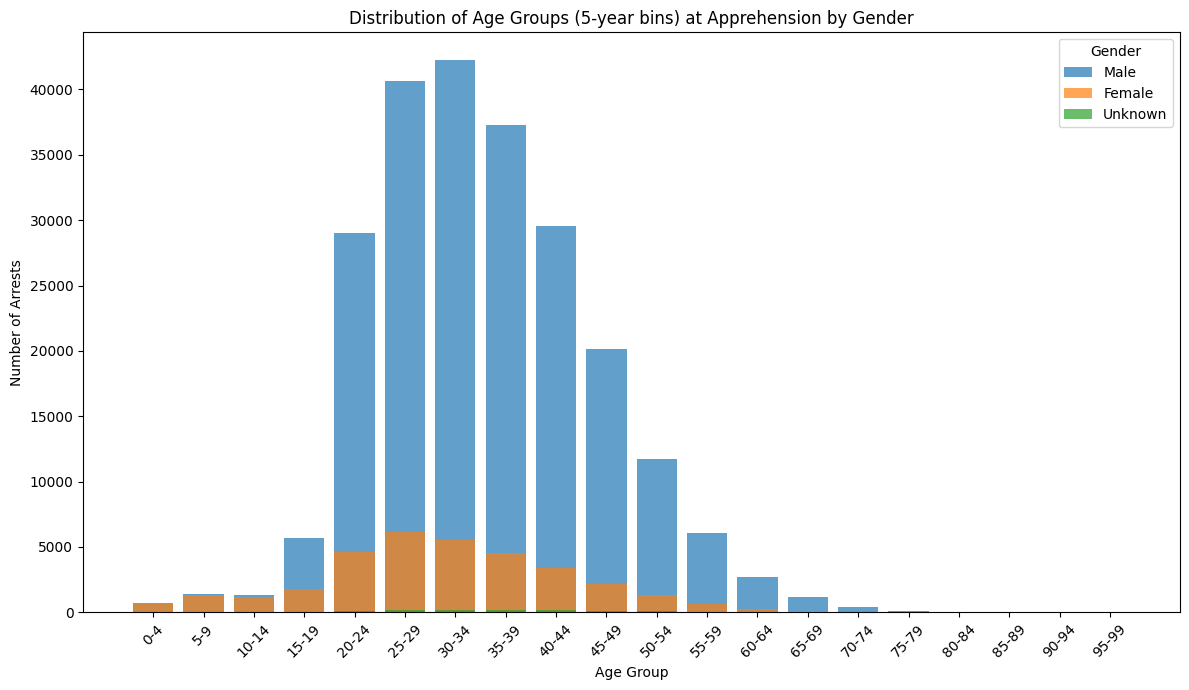

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate age at apprehension for each record
if "Birth Year" in df_arrests.columns and "Apprehension Date" in df_arrests.columns:
    df_arrests["Age"] = df_arrests["Apprehension Date"].dt.year - df_arrests["Birth Year"]
else:
    df_arrests["Age"] = np.nan

# Drop rows with missing or invalid ages
age_gender_df = df_arrests[["Age", "Gender"]].dropna()
age_gender_df = age_gender_df[(age_gender_df["Age"] > 0) & (age_gender_df["Age"] < 100)]

# Define 5-year bins
bins = np.arange(0, 100 + 5, 5)
labels = [f"{i}-{i+4}" for i in bins[:-1]]

# Bin the ages
age_gender_df["Age Group"] = pd.cut(age_gender_df["Age"], bins=bins, labels=labels, right=False)

# Plot histogram grouped by gender
plt.figure(figsize=(12, 7))
for gender in age_gender_df["Gender"].dropna().unique():
    group = age_gender_df[age_gender_df["Gender"] == gender]
    group_counts = group["Age Group"].value_counts().sort_index()
    plt.bar(group_counts.index, group_counts.values, alpha=0.7, label=str(gender))

plt.xlabel("Age Group")
plt.ylabel("Number of Arrests")
plt.title("Distribution of Age Groups (5-year bins) at Apprehension by Gender")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

Most targeted groups overall in any term are males (86.7 % of total arrests) in working ages, as 84.57% of total arrests among all population of the database are between the working age as defined by OCDE between 15-64 years old, the distribution peaks at 26-30 years for females and at 31-35 fo males as illustrated in the histogram.

Comparison between the Biden and Trump's second term shows that males between 31-35 are still the most targeted groups and that this age group skews 5 years younger for arrested women in both cases. The fact that the 287(g) agreement ramping up doesn´t affect age and gender is not surprising, given that most immigrants travel to the US for economic reasons, so men in working age seem to follow the same pattern as before. 

In [ ]:
import plotly.graph_objects as go

def sankey_data(df, top_n=10):
    pivot_counts = pd.pivot_table(
        df,
        index="Citizenship Country",
        columns="Gender",
        values="Unique Identifier",
        aggfunc="count",
        fill_value=0
    )
    pivot_counts_top = pivot_counts.loc[pivot_counts.sum(axis=1).sort_values(ascending=False).head(top_n).index]
    genders = list(pivot_counts_top.columns)
    countries = list(pivot_counts_top.index)
    labels = genders + countries
    source, target, value = [], [], []
    for i, gender in enumerate(genders):
        for j, country in enumerate(countries):
            count = pivot_counts_top.loc[country, gender]
            if count > 0:
                source.append(i)
                target.append(len(genders) + j)
                value.append(count)
    return labels, source, target, value, genders, countries

# Prepare Sankey data for both terms
labels_biden, source_biden, target_biden, value_biden, genders_biden, countries_biden = sankey_data(biden_term)
labels_trump2, source_trump2, target_trump2, value_trump2, genders_trump2, countries_trump2 = sankey_data(trump_second_term)

# Create subplots for two Sankey diagrams
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'sankey'}, {'type': 'sankey'}]],
                    subplot_titles=["Biden Term", "Trump 2nd Term"])

# Biden Sankey
fig.add_trace(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels_biden,
        color=["#4F81BD"]*len(genders_biden) + ["#C0504D"]*len(countries_biden)
    ),
    link=dict(
        source=source_biden,
        target=target_biden,
        value=value_biden,
        label=[f"{labels_biden[s]} → {labels_biden[t]}: {v} ({v / sum(value_biden) * 100:.1f}%)" for s, t, v in zip(source_biden, target_biden, value_biden)]
    )
), row=1, col=1)

# Trump 2nd Term Sankey
fig.add_trace(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels_trump2,
        color=["#4F81BD"]*len(genders_trump2) + ["#C0504D"]*len(countries_trump2)
    ),
    link=dict(
        source=source_trump2,
        target=target_trump2,
        value=value_trump2,
        label=[f"{labels_trump2[s]} → {labels_trump2[t]}: {v} ({v / sum(value_trump2) * 100:.1f}%)" for s, t, v in zip(source_trump2, target_trump2, value_trump2)]
    )
), row=1, col=2)

fig.update_layout(
    title_text="Sankey Diagrams: Gender and Citizenship Country (Top 10 Countries) - Biden vs Trump 2nd Term",
    font_size=12,
    height=600,
    width=1200
)
fig.write_image("outputs/figures/sankey_gender_citizenship_biden_trump2.png")
# Embed PNG in notebook
display(Image(filename="outputs/figures/sankey_gender_citizenship_biden_trump2.png"))

Overall, nationals from Mexico and countries from Central America (Guatemala, Honduras and El Salvador) account for the majority of the citizenship nationalities. 

Nonetheless, in only half of the first year of his second term, Trump administration has arrested more than half of all Mexican women arrested during Biden's presidency, and almost as much of male Salvadoreans, 

Question 1 raised from this exploratory analysis:

Why are Mexican women arrests ramping up relative to time in the US? Can it be linked to the apprehension by local enforcement agencies in communities, and hence linked to the 287(g) program?

Question 2 raised from this analysis

Is the ramping up of arrests of Salvadorean men linked to the actions of local enforcement agencies?

These two questions can be partially answered by comparing nationalities to methods of apprehension.

Then I create pivot tables and plot the comparison between the last two terms from the Country Citizenship and Area of Responsibility variables.

In [ ]:
# Create and save pivot tables (absolute only) for Citizenship Country x Apprehension AOR
def save_country_aor_pivot_absolute(df, term_name):
    pivot_counts = pd.pivot_table(
        df,
        index="Citizenship Country",
        columns="Apprehension AOR",
        values="Unique Identifier",
        aggfunc="count",
        fill_value=0
    )
    pivot_counts.to_csv(f"outputs/tables/{term_name}_country_aor_counts.csv")
    display(pivot_counts)
    return pivot_counts

# Generate and display/save for both terms (absolute only)
pivot_biden_counts = save_country_aor_pivot_absolute(biden_term, "biden_term")
pivot_trump2_counts = save_country_aor_pivot_absolute(trump_second_term, "trump_second_term")

# Sankey diagram for both terms (absolute only, top 5 countries for clarity)
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def sankey_country_aor_absolute(pivot_counts, top_n=5):
    top_countries = pivot_counts.sum(axis=1).sort_values(ascending=False).head(top_n).index.tolist()
    aors = list(pivot_counts.columns)
    countries = top_countries
    labels = countries + aors

    source_abs, target_abs, value_abs, label_abs = [], [], [], []
    for i, country in enumerate(countries):
        for j, aor in enumerate(aors):
            count = pivot_counts.loc[country, aor]
            if count > 0:
                source_abs.append(i)
                target_abs.append(len(countries) + j)
                value_abs.append(count)
                label_abs.append(f"{country} → {aor}: {count}")
    return labels, source_abs, target_abs, value_abs, label_abs

# Prepare Sankey data
labels_biden, s_abs_b, t_abs_b, v_abs_b, l_abs_b = sankey_country_aor_absolute(pivot_biden_counts, top_n=5)
labels_trump2, s_abs_t, t_abs_t, v_abs_t, l_abs_t = sankey_country_aor_absolute(pivot_trump2_counts, top_n=5)

# Create subplots: 1x2 (Biden/Trump2, absolute only)
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'sankey'}, {'type': 'sankey'}]],
    subplot_titles=[
        "Biden Term (Absolute)", "Trump 2nd Term (Absolute)"
    ]
)

# Biden Absolute
fig.add_trace(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels_biden,
        color=["#4F81BD"]*10 + ["#C0504D"]*len(pivot_biden_counts.columns)
    ),
    link=dict(
        source=s_abs_b,
        target=t_abs_b,
        value=v_abs_b,
        label=l_abs_b
    )
), row=1, col=1)

# Trump 2nd Term Absolute
fig.add_trace(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels_trump2,
        color=["#4F81BD"]*10 + ["#C0504D"]*len(pivot_trump2_counts.columns)
    ),
    link=dict(
        source=s_abs_t,
        target=t_abs_t,
        value=v_abs_t,
        label=l_abs_t
    )
), row=1, col=2)

fig.update_layout(
    title_text="Sankey Diagrams: Citizenship Country to Apprehension AOR (Top 5 Countries) - Biden vs Trump 2nd Term (Absolute Only)",
    font_size=12,
    height=600,
    width=1600
)
fig.write_image("outputs/figures/sankey_country_aor_biden_trump2_absolute.png")
fig.show()

In [ ]:
# Create tidy (long-format) pivot tables for Citizenship Country x Apprehension AOR and save with tidy names

def save_tidy_country_aor(df, term_name):
    tidy = (
        df.groupby(["Citizenship Country", "Apprehension AOR"])
        .agg(n_arrests=("Unique Identifier", "count"))
        .reset_index()
        .sort_values(["Citizenship Country", "Apprehension AOR"])
    )
    tidy.to_csv(f"outputs/tables/{term_name}_tidy_country_aor.csv", index=False)
    display(tidy.head())
    return tidy

tidy_biden = save_tidy_country_aor(biden_term, "biden_term")
tidy_trump2 = save_tidy_country_aor(trump_second_term, "trump_second_term")

,Citizenship Country,Apprehension AOR,n_arrests
0,AFGHANISTAN,Atlanta Area of Responsibility,3
1,AFGHANISTAN,Boston Area of Responsibility,1
2,AFGHANISTAN,Buffalo Area of Responsibility,8
3,AFGHANISTAN,Chicago Area of Responsibility,5
4,AFGHANISTAN,Dallas Area of Responsibility,5


,Citizenship Country,Apprehension AOR,n_arrests
0,AFGHANISTAN,Atlanta Area of Responsibility,1
1,AFGHANISTAN,Boston Area of Responsibility,3
2,AFGHANISTAN,Buffalo Area of Responsibility,1
3,AFGHANISTAN,Chicago Area of Responsibility,1
4,AFGHANISTAN,Dallas Area of Responsibility,9


From this analysis we can drill down on the change of demographics of Salvadorean arrests, which substituted Nicaraguan and is the only nationality change in the top 5 countries, although other notorious changes have happened, probably related to the narratives of criminalities we have seen reported. For instance, that Venezuelans already surpassed the number of total Venezuelan arrests of the whole Biden administration and that Mexican arrests represent around 70% of the total mexican arrests that the complete Biden Administration arrested. 

From the tidy tables we can see that the Dallas, Houston and New Orleans AORs are still the most depredatory towards the most national affected group (Mexican people), which has more to do probably with the number of migrants from different nationalities that migrate to the States, counties and cities that these AORs represent. 

A more complete analysis with rates of migrant population per AOR must be conducted to determine the actual changes these new policies bring about. 



## Step 2

Select one question from Task 3 Steps 2-4 and complete the analysis.
--
**What other methods of apprehension, in combination with the newly created facility column, can point to the participation of local enforcement agencies in the process of administrative arrests? How do this other methods compare to the previous term?**


## Apprehension method changes


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create and save pivot tables for Apprehension Method (Biden and Trump 2nd terms)
pivot_biden = pd.pivot_table(
    biden_term,
    index="Apprehension Method",
    values="Unique Identifier",
    aggfunc="count",
    fill_value=0
)
pivot_biden.to_csv("outputs/tables/biden_term_apprehension_method_counts.csv")

pivot_trump2 = pd.pivot_table(
    trump_second_term,
    index="Apprehension Method",
    values="Unique Identifier",
    aggfunc="count",
    fill_value=0
)
pivot_trump2.to_csv("outputs/tables/trump_second_term_apprehension_method_counts.csv")

# Prepare data for Sankey (Top N methods for clarity)
def sankey_data_methods(pivot, label_prefix=""):
    methods = list(pivot.index)
    values = list(pivot["Unique Identifier"])
    # For Sankey, create a dummy source node (0) and connect to each method node (1,2,...)
    labels = [label_prefix + "All Arrests"] + methods
    source = [0] * len(methods)
    target = list(range(1, len(methods) + 1))
    value = values
    return labels, source, target, value

labels_biden, source_biden, target_biden, value_biden = sankey_data_methods(pivot_biden, "Biden: ")
labels_trump2, source_trump2, target_trump2, value_trump2 = sankey_data_methods(pivot_trump2, "Trump2: ")

# Create subplots for two Sankey diagrams
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'sankey'}, {'type': 'sankey'}]],
                    subplot_titles=["Biden Term", "Trump 2nd Term"])

# Biden Sankey
fig.add_trace(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels_biden,
        color=["#4F81BD"] + ["#C0504D"]*len(pivot_biden)
    ),
    link=dict(
        source=source_biden,
        target=target_biden,
        value=value_biden,
        label=[f"{labels_biden[t]}: {v} ({v / sum(value_biden) * 100:.1f}%)" for t, v in zip(target_biden, value_biden)]
    )
), row=1, col=1)

# Trump 2nd Term Sankey
fig.add_trace(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels_trump2,
        color=["#4F81BD"] + ["#C0504D"]*len(pivot_trump2)
    ),
    link=dict(
        source=source_trump2,
        target=target_trump2,
        value=value_trump2,
        label=[f"{labels_trump2[t]}: {v} ({v / sum(value_trump2) * 100:.1f}%)" for t, v in zip(target_trump2, value_trump2)]
    )
), row=1, col=2)

fig.update_layout(
    title_text="Sankey Diagrams: Apprehension Method Distribution - Biden vs Trump 2nd Term",
    font_size=12,
    height=600,
    width=1200
)
fig.write_image("outputs/figures/sankey_apprehension_method_biden_trump2.png")
fig.show()

In [ ]:
fig.show()

From this figure, we can asess that specifically related to the 287 program, the arrests have been more than half in 6 months than all of the Biden's term, reflecting the ramping up of the use of this program to target population. This specifically, but not exclusively, includes the participation of Local Enforcement Agencies. We then add all other programs that could be related to local forces enactment. 

In [ ]:
# Define the list of LEA-linked methods
lea_methods = [
    "287(g) Program",
    "CAP Local Incarceration",
    "CAP State Incarceration",
    "Law Enforcement Agency Response Unit",
    "Traffic Check"
]

# Add a new column to each arrests table
biden_term["LEA_Linked_Method"] = biden_term["Apprehension Method"].apply(
    lambda x: "LEA linked method" if x in lea_methods else ""
)
trump_second_term["LEA_Linked_Method"] = trump_second_term["Apprehension Method"].apply(
    lambda x: "LEA linked method" if x in lea_methods else ""
)

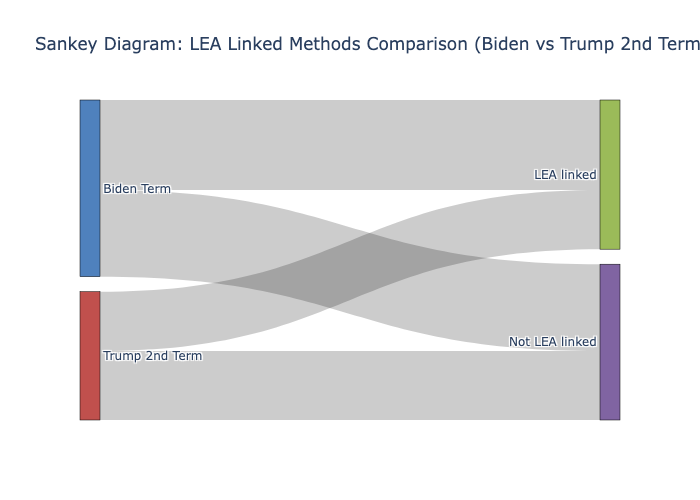

In [25]:
import plotly.graph_objects as go
from IPython.display import Image, display

# Prepare counts for each term
biden_counts = biden_term["LEA_Linked_Method"].value_counts().rename({"LEA linked method": "LEA linked", "": "Not LEA linked"})
trump2_counts = trump_second_term["LEA_Linked_Method"].value_counts().rename({"LEA linked method": "LEA linked", "": "Not LEA linked"})

categories = ["LEA linked", "Not LEA linked"]
biden_counts = biden_counts.reindex(categories, fill_value=0)
trump2_counts = trump2_counts.reindex(categories, fill_value=0)

# Sankey nodes: [Biden, Trump2, LEA linked, Not LEA linked]
labels = ["Biden Term", "Trump 2nd Term", "LEA linked", "Not LEA linked"]

# Sources and targets for Sankey
source = [0, 0, 1, 1]  # Biden to LEA, Biden to Not LEA, Trump2 to LEA, Trump2 to Not LEA
target = [2, 3, 2, 3]
value = [
    biden_counts["LEA linked"],
    biden_counts["Not LEA linked"],
    trump2_counts["LEA linked"],
    trump2_counts["Not LEA linked"]
]

# Create Sankey figure
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["#4F81BD", "#C0504D", "#9BBB59", "#8064A2"]
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        label=[
            f"Biden → {categories[0]}: {biden_counts['LEA linked']}",
            f"Biden → {categories[1]}: {biden_counts['Not LEA linked']}",
            f"Trump2 → {categories[0]}: {trump2_counts['LEA linked']}",
            f"Trump2 → {categories[1]}: {trump2_counts['Not LEA linked']}"
        ]
    )
))

fig.update_layout(
    title_text="Sankey Diagram: LEA Linked Methods Comparison (Biden vs Trump 2nd Term)",
    font_size=12,
    height=400,
    width=700
)

# Save as PNG
fig.write_image("outputs/figures/sankey_lea_linked_biden_trump2.png")

# Embed PNG in notebook
display(Image(filename="outputs/figures/sankey_lea_linked_biden_trump2.png"))